In [11]:
import matplotlib.pyplot as plt
import csv


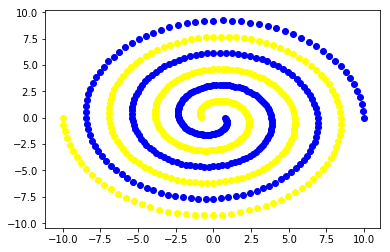

Total dataset m:  576


In [39]:
# taken from two-spirals.c by Matt White
import math

def create_spiral_dataset(density=1, maxRadius=6.5):
    x_spiral = []
    y_spiral = []
    points = math.ceil(96 * density) # total number of points to generate
    
    for num in range(points):
        # Angle is based on the current iteration times pi/16, divided by density
        angle = (num * math.pi) / ( 16.0 * density)
        
        # Radius is the maximum radius times the fraction of iterations left
        radius = maxRadius * ( (104.0 * density) - num) / (104.0 * density)
        
        # calculate x and y based on cos and sin, according to the paper
        x_cos = radius * math.cos(angle)
        y_sin = radius * math.sin(angle)
        
        x_spiral.append([x_cos, y_sin]) # non mirror point
        y_spiral.append([0]) # label for non mirror
        x_spiral.append([-x_cos, -y_sin]) # mirroring point for the spiral that goes the other way around
        y_spiral.append([1]) # label mirror
        
    return x_spiral, y_spiral

x, y = create_spiral_dataset(density=3, maxRadius=10)

blue_x = []
blue_y = []
yellow_x = []
yellow_y = []

for idx, point in enumerate(x):
    if y[idx][0] == 0:
        # non-mirror, blue
        blue_x.append(point[0])
        blue_y.append(point[1])
    else:
        yellow_x.append(point[0])
        yellow_y.append(point[1])

plt.scatter(blue_x, blue_y, color='blue')
plt.scatter(yellow_x, yellow_y, color='yellow')

plt.show()

print('Total dataset m: ', len(blue_x) + len(blue_y))

        

In [40]:
import tensorflow as tf
import numpy as np

# convert dataset into numpy array
np_x = np.array(x) # features 
np_y = np.array(y) # labels

combined_x_y = np.array(list(zip(x, y)))
np.random.shuffle(combined_x_y)

# separate data into train, validation and test sets
training_size = math.floor(combined_x_y.shape[0] * 0.70)
validation_size = math.floor(combined_x_y.shape[0] * 0.20)
test_size = combined_x_y.shape[0] - training_size - validation_size
training_set = combined_x_y[:training_size]
validation_set = combined_x_y[training_size: training_size + validation_size]
test_set = combined_x_y[training_size + validation_size:]

print("training set: ", training_size)
print("validation set: ", validation_size)
print("test set: ", test_size)

print("total dataset: ", combined_x_y.shape)
print("training set: ", training_set.shape)
print("validation set: ", validation_set.shape)
print("test set: ", test_set.shape)

# https://stackoverflow.com/questions/12974474/how-to-unzip-a-list-of-tuples-into-individual-lists
# The zip() function pairs up the elements from all inputs, starting with the first values, then the
# second, etc. By using *l you apply all tuples in l as separate arguments to the zip() function, so
# zip() pairs up 1 with 3 with 8 first, then 2 with 4 and 9. 
# Those happen to correspond nicely with the columns, or the transposition of l.
unzip_training = np.array(list(zip(*training_set)))
training_x = np.array([np.array(x) for x in unzip_training[0]])
training_y = np.array([np.array(y) for y in unzip_training[1]])

print('training_x: ', training_x.shape)
print('training_y: ', training_y.shape)

unzip_validation = np.array(list(zip(*validation_set))) 
validation_x = np.array([np.array(x) for x in unzip_validation[0]])
validation_y = np.array([np.array(y) for y in unzip_validation[1]])

print('validation_x: ', validation_x.shape)
print('validation_y: ', validation_y.shape)

unzip_test = np.array(list(zip(*test_set))) 
test_x = np.array([np.array(x) for x in unzip_test[0]])
test_y = np.array([np.array(y) for y in unzip_test[1]])

print('test_x: ', test_x.shape)
print('test_y: ', test_y.shape)


training set:  403
validation set:  115
test set:  58
total dataset:  (576, 2)
training set:  (403, 2)
validation set:  (115, 2)
test set:  (58, 2)
training_x:  (403, 2)
training_y:  (403, 1)
validation_x:  (115, 2)
validation_y:  (115, 1)
test_x:  (58, 2)
test_y:  (58, 1)


In [41]:
# placeholders for data
x_pl = tf.placeholder(tf.float32, [None, np_x.shape[1]], name='feature_inputs')
y_pl = tf.placeholder(tf.float32, [None, np_y.shape[1]], name='labels')

# Average Error: 0.00128 (eye ball value)
# l0_units = 20
# l1_units = 40
# l2_units = 80

l0_units = 20
l1_units = 40
l2_units = 100

# l3_units = 80
# l4_units = 40
# l5_units = 20
# out = 2

# Neural Network
# 1st layer
l0_w = tf.Variable(tf.random_normal([2, l0_units]))
l0_b = tf.Variable(tf.random_normal([l0_units]))
l0 = tf.nn.sigmoid(tf.add(tf.matmul(x_pl, l0_w), l0_b))

# 2nd layer
l1_w = tf.Variable(tf.random_normal([l0_units, l1_units]))
l1_b = tf.Variable(tf.random_normal([l1_units]))
l1 = tf.nn.sigmoid(tf.add(tf.matmul(l0, l1_w), l1_b))

# 3rd layer
l2_w = tf.Variable(tf.random_normal([l1_units, l2_units]))
l2_b = tf.Variable(tf.random_normal([1]))
l2 = tf.nn.sigmoid(tf.add(tf.matmul(l1, l2_w), l2_b))

# 4rd layer
l3_w = tf.Variable(tf.random_normal([l2_units, 1]))
l3_b = tf.Variable(tf.random_normal([1]))
l3 = tf.nn.sigmoid(tf.add(tf.matmul(l2, l3_w), l3_b))

# 5rd layer
# l4_w = tf.Variable(tf.random_normal([l3_units, 1]))
# l4_b = tf.Variable(tf.random_normal([1]))
# l4 = tf.nn.sigmoid(tf.add(tf.matmul(l3, l4_w), l4_b))

# 6rd layer
# l5_w = tf.Variable(tf.random_normal([l4_units, l5_units]))
# l5_b = tf.Variable(tf.random_normal([l5_units]))
# l5 = tf.nn.sigmoid(tf.add(tf.matmul(l4, l5_w), l5_b))

# output layer
# out_w = tf.Variable(tf.random_normal([l5_units, 1]))
# out_b = tf.Variable(tf.random_normal([l5_units]))
# out = tf.add(tf.matmul(l5, out_w), out_b)

# cost function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_pl, predictions=l3))

# optimizer algorithm
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.3).minimize(cost)
# optimizer = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(cost)
optimizer = tf.train.MomentumOptimizer(learning_rate=0.5, momentum=0.6).minimize(cost)

In [42]:
# Required: Run previous cell to create the neural network model
# training
n_epochs = 18000

errors = []
training_errors = [] # error in training for each epoch
validation_accuracy = [] # accuracy in validation for each epoch
predictions = None
activation_range = np.arange(-10, 10, 0.1)
coordinates = [[x, y] for x in activation_range for y in activation_range]

with tf.Session() as sess:
    # tf.global_variables_initializer().run()
    
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        _, error = sess.run([optimizer, cost], feed_dict={x_pl: np_x, y_pl: np_y})
        errors.append(error)
        print('epoch: ', i, 'error: ', error)
        
        # Use train, validation, test set
        # _, train_err = sess.run([optimizer, cost], feed_dict={x_pl: training_x, y_pl: training_y})
        # training_errors.append(train_err)
        # validation_pred = [np.round(pred) for pred in sess.run(l5, feed_dict={x_pl: validation_x})]
        # 
        # # difference = (validation_pred == validation_y).astype(int)
        # difference = np.array([y_prime[0] == y[0] for y_prime, y in zip(validation_pred, validation_y) ]).astype(int)
        # 
        # total_correct_pred = np.sum(difference)
        # accuracy = total_correct_pred / validation_y.shape[0]
        # validation_accuracy.append(accuracy)
        # print('epoch: ', i, 'training error: ', train_err, 'accuracy: ', accuracy)
        
    # Use the trained model to classify all points in a 10 x 10 graph
    predictions = sess.run(l3, feed_dict={x_pl: coordinates}) # use numpy.round?

epoch:  0 error:  0.4925685
epoch:  1 error:  0.4908965
epoch:  2 error:  0.48686913
epoch:  3 error:  0.47704914
epoch:  4 error:  0.44581068
epoch:  5 error:  0.3229153
epoch:  6 error:  0.36455196
epoch:  7 error:  0.35993665
epoch:  8 error:  0.27981886
epoch:  9 error:  0.3052526
epoch:  10 error:  0.26527104
epoch:  11 error:  0.26216698
epoch:  12 error:  0.2653576
epoch:  13 error:  0.25442836
epoch:  14 error:  0.2466833
epoch:  15 error:  0.24394184
epoch:  16 error:  0.24307235
epoch:  17 error:  0.24266058
epoch:  18 error:  0.24214114
epoch:  19 error:  0.24147473
epoch:  20 error:  0.24078634
epoch:  21 error:  0.24028108
epoch:  22 error:  0.23991953
epoch:  23 error:  0.23972835
epoch:  24 error:  0.23957205
epoch:  25 error:  0.23950784
epoch:  26 error:  0.23937422
epoch:  27 error:  0.23926443
epoch:  28 error:  0.2390149
epoch:  29 error:  0.23878177
epoch:  30 error:  0.23842083
epoch:  31 error:  0.23811139
epoch:  32 error:  0.23771021
epoch:  33 error:  0.237385

epoch:  310 error:  0.22222407
epoch:  311 error:  0.22227632
epoch:  312 error:  0.22217537
epoch:  313 error:  0.22222884
epoch:  314 error:  0.22212704
epoch:  315 error:  0.2221818
epoch:  316 error:  0.22207898
epoch:  317 error:  0.22213514
epoch:  318 error:  0.22203135
epoch:  319 error:  0.22208881
epoch:  320 error:  0.22198398
epoch:  321 error:  0.2220428
epoch:  322 error:  0.22193696
epoch:  323 error:  0.22199711
epoch:  324 error:  0.22189026
epoch:  325 error:  0.22195183
epoch:  326 error:  0.2218439
epoch:  327 error:  0.22190689
epoch:  328 error:  0.22179787
epoch:  329 error:  0.22186226
epoch:  330 error:  0.22175214
epoch:  331 error:  0.2218179
epoch:  332 error:  0.22170663
epoch:  333 error:  0.2217739
epoch:  334 error:  0.22166151
epoch:  335 error:  0.2217302
epoch:  336 error:  0.22161654
epoch:  337 error:  0.22168678
epoch:  338 error:  0.22157203
epoch:  339 error:  0.22164367
epoch:  340 error:  0.22152768
epoch:  341 error:  0.22160089
epoch:  342 er

epoch:  581 error:  0.21748121
epoch:  582 error:  0.21703464
epoch:  583 error:  0.217448
epoch:  584 error:  0.21699741
epoch:  585 error:  0.21741469
epoch:  586 error:  0.21696007
epoch:  587 error:  0.21738127
epoch:  588 error:  0.2169225
epoch:  589 error:  0.21734755
epoch:  590 error:  0.21688476
epoch:  591 error:  0.21731383
epoch:  592 error:  0.216847
epoch:  593 error:  0.21727994
epoch:  594 error:  0.21680917
epoch:  595 error:  0.217246
epoch:  596 error:  0.21677123
epoch:  597 error:  0.21721199
epoch:  598 error:  0.21673313
epoch:  599 error:  0.2171778
epoch:  600 error:  0.21669483
epoch:  601 error:  0.21714348
epoch:  602 error:  0.21665648
epoch:  603 error:  0.21710905
epoch:  604 error:  0.2166181
epoch:  605 error:  0.21707456
epoch:  606 error:  0.21657953
epoch:  607 error:  0.2170399
epoch:  608 error:  0.21654081
epoch:  609 error:  0.21700501
epoch:  610 error:  0.21650189
epoch:  611 error:  0.21697
epoch:  612 error:  0.21646282
epoch:  613 error:  0

epoch:  856 error:  0.21069059
epoch:  857 error:  0.2113967
epoch:  858 error:  0.21063891
epoch:  859 error:  0.21134499
epoch:  860 error:  0.21058708
epoch:  861 error:  0.21129318
epoch:  862 error:  0.21053535
epoch:  863 error:  0.21124132
epoch:  864 error:  0.21048363
epoch:  865 error:  0.21118975
epoch:  866 error:  0.21043208
epoch:  867 error:  0.2111381
epoch:  868 error:  0.21038046
epoch:  869 error:  0.2110864
epoch:  870 error:  0.21032876
epoch:  871 error:  0.21103457
epoch:  872 error:  0.21027718
epoch:  873 error:  0.21098281
epoch:  874 error:  0.21022548
epoch:  875 error:  0.21093114
epoch:  876 error:  0.21017398
epoch:  877 error:  0.21087947
epoch:  878 error:  0.21012248
epoch:  879 error:  0.21082786
epoch:  880 error:  0.21007092
epoch:  881 error:  0.2107761
epoch:  882 error:  0.21001938
epoch:  883 error:  0.2107244
epoch:  884 error:  0.20996785
epoch:  885 error:  0.2106728
epoch:  886 error:  0.20991653
epoch:  887 error:  0.2106213
epoch:  888 err

epoch:  1133 error:  0.20448695
epoch:  1134 error:  0.20381321
epoch:  1135 error:  0.20443824
epoch:  1136 error:  0.20376559
epoch:  1137 error:  0.20438951
epoch:  1138 error:  0.2037179
epoch:  1139 error:  0.20434059
epoch:  1140 error:  0.20367019
epoch:  1141 error:  0.20429172
epoch:  1142 error:  0.2036225
epoch:  1143 error:  0.204243
epoch:  1144 error:  0.20357488
epoch:  1145 error:  0.20419423
epoch:  1146 error:  0.20352724
epoch:  1147 error:  0.20414537
epoch:  1148 error:  0.20347953
epoch:  1149 error:  0.20409656
epoch:  1150 error:  0.20343187
epoch:  1151 error:  0.20404778
epoch:  1152 error:  0.20338437
epoch:  1153 error:  0.20399894
epoch:  1154 error:  0.20333658
epoch:  1155 error:  0.20394997
epoch:  1156 error:  0.20328887
epoch:  1157 error:  0.20390111
epoch:  1158 error:  0.20324129
epoch:  1159 error:  0.20385234
epoch:  1160 error:  0.20319366
epoch:  1161 error:  0.2038034
epoch:  1162 error:  0.20314597
epoch:  1163 error:  0.20375441
epoch:  1164 

epoch:  1400 error:  0.19740443
epoch:  1401 error:  0.19776997
epoch:  1402 error:  0.19735572
epoch:  1403 error:  0.19771871
epoch:  1404 error:  0.19730715
epoch:  1405 error:  0.19766754
epoch:  1406 error:  0.19725853
epoch:  1407 error:  0.19761626
epoch:  1408 error:  0.19720976
epoch:  1409 error:  0.19756484
epoch:  1410 error:  0.19716103
epoch:  1411 error:  0.19751371
epoch:  1412 error:  0.19711253
epoch:  1413 error:  0.19746256
epoch:  1414 error:  0.19706392
epoch:  1415 error:  0.19741127
epoch:  1416 error:  0.19701512
epoch:  1417 error:  0.19735993
epoch:  1418 error:  0.19696648
epoch:  1419 error:  0.19730875
epoch:  1420 error:  0.19691788
epoch:  1421 error:  0.19725746
epoch:  1422 error:  0.19686918
epoch:  1423 error:  0.19720623
epoch:  1424 error:  0.19682051
epoch:  1425 error:  0.19715495
epoch:  1426 error:  0.19677186
epoch:  1427 error:  0.19710366
epoch:  1428 error:  0.19672315
epoch:  1429 error:  0.19705245
epoch:  1430 error:  0.19667448
epoch:  

epoch:  1689 error:  0.19059326
epoch:  1690 error:  0.19052197
epoch:  1691 error:  0.19054711
epoch:  1692 error:  0.19047768
epoch:  1693 error:  0.19050105
epoch:  1694 error:  0.19043356
epoch:  1695 error:  0.19045505
epoch:  1696 error:  0.19038953
epoch:  1697 error:  0.19040924
epoch:  1698 error:  0.19034556
epoch:  1699 error:  0.19036332
epoch:  1700 error:  0.1903016
epoch:  1701 error:  0.1903176
epoch:  1702 error:  0.1902577
epoch:  1703 error:  0.19027178
epoch:  1704 error:  0.19021381
epoch:  1705 error:  0.19022614
epoch:  1706 error:  0.19017006
epoch:  1707 error:  0.19018055
epoch:  1708 error:  0.1901263
epoch:  1709 error:  0.19013497
epoch:  1710 error:  0.19008255
epoch:  1711 error:  0.19008942
epoch:  1712 error:  0.19003893
epoch:  1713 error:  0.190044
epoch:  1714 error:  0.18999527
epoch:  1715 error:  0.18999846
epoch:  1716 error:  0.18995161
epoch:  1717 error:  0.18995315
epoch:  1718 error:  0.18990819
epoch:  1719 error:  0.18990786
epoch:  1720 e

epoch:  1959 error:  0.18482642
epoch:  1960 error:  0.18496472
epoch:  1961 error:  0.18478839
epoch:  1962 error:  0.18492797
epoch:  1963 error:  0.18475048
epoch:  1964 error:  0.18489133
epoch:  1965 error:  0.18471259
epoch:  1966 error:  0.1848548
epoch:  1967 error:  0.1846749
epoch:  1968 error:  0.18481833
epoch:  1969 error:  0.18463714
epoch:  1970 error:  0.18478186
epoch:  1971 error:  0.18459956
epoch:  1972 error:  0.18474555
epoch:  1973 error:  0.18456207
epoch:  1974 error:  0.18470936
epoch:  1975 error:  0.18452471
epoch:  1976 error:  0.18467331
epoch:  1977 error:  0.18448752
epoch:  1978 error:  0.18463731
epoch:  1979 error:  0.18445031
epoch:  1980 error:  0.18460135
epoch:  1981 error:  0.18441309
epoch:  1982 error:  0.18456537
epoch:  1983 error:  0.18437606
epoch:  1984 error:  0.18452969
epoch:  1985 error:  0.18433923
epoch:  1986 error:  0.18449406
epoch:  1987 error:  0.18430234
epoch:  1988 error:  0.18445837
epoch:  1989 error:  0.18426548
epoch:  19

epoch:  2227 error:  0.18041082
epoch:  2228 error:  0.18071043
epoch:  2229 error:  0.18038177
epoch:  2230 error:  0.1806825
epoch:  2231 error:  0.18035275
epoch:  2232 error:  0.1806546
epoch:  2233 error:  0.18032375
epoch:  2234 error:  0.1806268
epoch:  2235 error:  0.18029481
epoch:  2236 error:  0.1805991
epoch:  2237 error:  0.18026596
epoch:  2238 error:  0.18057126
epoch:  2239 error:  0.18023697
epoch:  2240 error:  0.1805435
epoch:  2241 error:  0.18020809
epoch:  2242 error:  0.18051574
epoch:  2243 error:  0.18017921
epoch:  2244 error:  0.18048805
epoch:  2245 error:  0.18015039
epoch:  2246 error:  0.18046038
epoch:  2247 error:  0.18012157
epoch:  2248 error:  0.18043266
epoch:  2249 error:  0.18009275
epoch:  2250 error:  0.1804051
epoch:  2251 error:  0.18006405
epoch:  2252 error:  0.18037756
epoch:  2253 error:  0.18003544
epoch:  2254 error:  0.18035012
epoch:  2255 error:  0.18000677
epoch:  2256 error:  0.18032253
epoch:  2257 error:  0.17997807
epoch:  2258 e

epoch:  2497 error:  0.17659229
epoch:  2498 error:  0.17703485
epoch:  2499 error:  0.1765638
epoch:  2500 error:  0.17700727
epoch:  2501 error:  0.17653519
epoch:  2502 error:  0.17697948
epoch:  2503 error:  0.17650649
epoch:  2504 error:  0.17695172
epoch:  2505 error:  0.17647786
epoch:  2506 error:  0.17692395
epoch:  2507 error:  0.17644922
epoch:  2508 error:  0.17689623
epoch:  2509 error:  0.1764206
epoch:  2510 error:  0.17686848
epoch:  2511 error:  0.17639208
epoch:  2512 error:  0.17684078
epoch:  2513 error:  0.17636335
epoch:  2514 error:  0.17681289
epoch:  2515 error:  0.17633465
epoch:  2516 error:  0.17678505
epoch:  2517 error:  0.17630588
epoch:  2518 error:  0.17675717
epoch:  2519 error:  0.17627726
epoch:  2520 error:  0.17672941
epoch:  2521 error:  0.1762486
epoch:  2522 error:  0.17670159
epoch:  2523 error:  0.17621994
epoch:  2524 error:  0.17667376
epoch:  2525 error:  0.17619117
epoch:  2526 error:  0.17664586
epoch:  2527 error:  0.17616244
epoch:  252

epoch:  2760 error:  0.17330325
epoch:  2761 error:  0.17274347
epoch:  2762 error:  0.17327422
epoch:  2763 error:  0.17271392
epoch:  2764 error:  0.17324513
epoch:  2765 error:  0.17268434
epoch:  2766 error:  0.17321615
epoch:  2767 error:  0.17265485
epoch:  2768 error:  0.17318708
epoch:  2769 error:  0.17262536
epoch:  2770 error:  0.17315806
epoch:  2771 error:  0.17259587
epoch:  2772 error:  0.17312908
epoch:  2773 error:  0.17256637
epoch:  2774 error:  0.1731001
epoch:  2775 error:  0.17253682
epoch:  2776 error:  0.17307095
epoch:  2777 error:  0.17250729
epoch:  2778 error:  0.1730419
epoch:  2779 error:  0.17247778
epoch:  2780 error:  0.17301284
epoch:  2781 error:  0.17244826
epoch:  2782 error:  0.17298383
epoch:  2783 error:  0.17241873
epoch:  2784 error:  0.17295472
epoch:  2785 error:  0.1723892
epoch:  2786 error:  0.17292574
epoch:  2787 error:  0.17235968
epoch:  2788 error:  0.17289662
epoch:  2789 error:  0.17233013
epoch:  2790 error:  0.17286757
epoch:  279

epoch:  3030 error:  0.16937858
epoch:  3031 error:  0.16875564
epoch:  3032 error:  0.16934966
epoch:  3033 error:  0.1687262
epoch:  3034 error:  0.16932076
epoch:  3035 error:  0.16869675
epoch:  3036 error:  0.16929185
epoch:  3037 error:  0.16866732
epoch:  3038 error:  0.16926302
epoch:  3039 error:  0.16863792
epoch:  3040 error:  0.1692342
epoch:  3041 error:  0.16860846
epoch:  3042 error:  0.16920526
epoch:  3043 error:  0.16857897
epoch:  3044 error:  0.1691764
epoch:  3045 error:  0.16854954
epoch:  3046 error:  0.16914748
epoch:  3047 error:  0.16852003
epoch:  3048 error:  0.16911858
epoch:  3049 error:  0.16849059
epoch:  3050 error:  0.16908963
epoch:  3051 error:  0.16846111
epoch:  3052 error:  0.16906084
epoch:  3053 error:  0.16843173
epoch:  3054 error:  0.16903204
epoch:  3055 error:  0.16840233
epoch:  3056 error:  0.16900325
epoch:  3057 error:  0.1683729
epoch:  3058 error:  0.16897437
epoch:  3059 error:  0.1683434
epoch:  3060 error:  0.16894545
epoch:  3061 

epoch:  3293 error:  0.16486505
epoch:  3294 error:  0.16554576
epoch:  3295 error:  0.1648348
epoch:  3296 error:  0.16551614
epoch:  3297 error:  0.16480452
epoch:  3298 error:  0.16548654
epoch:  3299 error:  0.16477421
epoch:  3300 error:  0.1654569
epoch:  3301 error:  0.16474393
epoch:  3302 error:  0.16542728
epoch:  3303 error:  0.16471368
epoch:  3304 error:  0.16539764
epoch:  3305 error:  0.16468328
epoch:  3306 error:  0.16536784
epoch:  3307 error:  0.16465291
epoch:  3308 error:  0.1653382
epoch:  3309 error:  0.16462255
epoch:  3310 error:  0.16530845
epoch:  3311 error:  0.16459224
epoch:  3312 error:  0.16527879
epoch:  3313 error:  0.16456181
epoch:  3314 error:  0.16524898
epoch:  3315 error:  0.16453142
epoch:  3316 error:  0.16521916
epoch:  3317 error:  0.16450097
epoch:  3318 error:  0.16518934
epoch:  3319 error:  0.16447057
epoch:  3320 error:  0.16515958
epoch:  3321 error:  0.16444013
epoch:  3322 error:  0.16512975
epoch:  3323 error:  0.16440971
epoch:  332

epoch:  3590 error:  0.1609574
epoch:  3591 error:  0.16020775
epoch:  3592 error:  0.160925
epoch:  3593 error:  0.16017577
epoch:  3594 error:  0.16089271
epoch:  3595 error:  0.16014385
epoch:  3596 error:  0.16086048
epoch:  3597 error:  0.16011187
epoch:  3598 error:  0.16082828
epoch:  3599 error:  0.16008002
epoch:  3600 error:  0.16079587
epoch:  3601 error:  0.16004802
epoch:  3602 error:  0.16076356
epoch:  3603 error:  0.16001602
epoch:  3604 error:  0.16073118
epoch:  3605 error:  0.15998408
epoch:  3606 error:  0.16069888
epoch:  3607 error:  0.15995215
epoch:  3608 error:  0.16066656
epoch:  3609 error:  0.15992025
epoch:  3610 error:  0.16063422
epoch:  3611 error:  0.15988824
epoch:  3612 error:  0.16060185
epoch:  3613 error:  0.15985632
epoch:  3614 error:  0.16056952
epoch:  3615 error:  0.1598244
epoch:  3616 error:  0.16053727
epoch:  3617 error:  0.1597925
epoch:  3618 error:  0.16050482
epoch:  3619 error:  0.15976045
epoch:  3620 error:  0.16047233
epoch:  3621 

epoch:  3885 error:  0.1555965
epoch:  3886 error:  0.1561891
epoch:  3887 error:  0.15556636
epoch:  3888 error:  0.15615767
epoch:  3889 error:  0.15553623
epoch:  3890 error:  0.15612637
epoch:  3891 error:  0.15550613
epoch:  3892 error:  0.156095
epoch:  3893 error:  0.15547597
epoch:  3894 error:  0.15606354
epoch:  3895 error:  0.15544583
epoch:  3896 error:  0.15603226
epoch:  3897 error:  0.15541577
epoch:  3898 error:  0.15600093
epoch:  3899 error:  0.15538573
epoch:  3900 error:  0.15596974
epoch:  3901 error:  0.1553558
epoch:  3902 error:  0.15593855
epoch:  3903 error:  0.15532592
epoch:  3904 error:  0.15590747
epoch:  3905 error:  0.15529603
epoch:  3906 error:  0.15587626
epoch:  3907 error:  0.15526606
epoch:  3908 error:  0.15584499
epoch:  3909 error:  0.15523604
epoch:  3910 error:  0.15581378
epoch:  3911 error:  0.15520616
epoch:  3912 error:  0.15578273
epoch:  3913 error:  0.15517634
epoch:  3914 error:  0.1557516
epoch:  3915 error:  0.15514655
epoch:  3916 e

epoch:  4157 error:  0.15179223
epoch:  4158 error:  0.15221947
epoch:  4159 error:  0.15176664
epoch:  4160 error:  0.15219289
epoch:  4161 error:  0.1517412
epoch:  4162 error:  0.15216626
epoch:  4163 error:  0.1517157
epoch:  4164 error:  0.15213968
epoch:  4165 error:  0.15169027
epoch:  4166 error:  0.1521131
epoch:  4167 error:  0.15166484
epoch:  4168 error:  0.15208657
epoch:  4169 error:  0.15163946
epoch:  4170 error:  0.15206015
epoch:  4171 error:  0.15161416
epoch:  4172 error:  0.15203367
epoch:  4173 error:  0.15158881
epoch:  4174 error:  0.15200716
epoch:  4175 error:  0.15156344
epoch:  4176 error:  0.15198061
epoch:  4177 error:  0.15153807
epoch:  4178 error:  0.1519542
epoch:  4179 error:  0.15151286
epoch:  4180 error:  0.15192789
epoch:  4181 error:  0.15148772
epoch:  4182 error:  0.15190168
epoch:  4183 error:  0.1514626
epoch:  4184 error:  0.15187547
epoch:  4185 error:  0.15143749
epoch:  4186 error:  0.15184924
epoch:  4187 error:  0.15141235
epoch:  4188 

epoch:  4428 error:  0.14890021
epoch:  4429 error:  0.14858615
epoch:  4430 error:  0.1488776
epoch:  4431 error:  0.1485644
epoch:  4432 error:  0.14885496
epoch:  4433 error:  0.14854264
epoch:  4434 error:  0.14883226
epoch:  4435 error:  0.14852087
epoch:  4436 error:  0.14880969
epoch:  4437 error:  0.14849915
epoch:  4438 error:  0.14878708
epoch:  4439 error:  0.14847746
epoch:  4440 error:  0.14876455
epoch:  4441 error:  0.14845577
epoch:  4442 error:  0.14874199
epoch:  4443 error:  0.14843419
epoch:  4444 error:  0.14871955
epoch:  4445 error:  0.14841262
epoch:  4446 error:  0.14869708
epoch:  4447 error:  0.14839098
epoch:  4448 error:  0.14867465
epoch:  4449 error:  0.1483694
epoch:  4450 error:  0.14865229
epoch:  4451 error:  0.14834793
epoch:  4452 error:  0.14862987
epoch:  4453 error:  0.14832644
epoch:  4454 error:  0.14860752
epoch:  4455 error:  0.14830494
epoch:  4456 error:  0.14858519
epoch:  4457 error:  0.1482835
epoch:  4458 error:  0.14856292
epoch:  4459

epoch:  4710 error:  0.14596617
epoch:  4711 error:  0.14575775
epoch:  4712 error:  0.14594723
epoch:  4713 error:  0.14573939
epoch:  4714 error:  0.14592831
epoch:  4715 error:  0.1457211
epoch:  4716 error:  0.14590941
epoch:  4717 error:  0.14570281
epoch:  4718 error:  0.14589061
epoch:  4719 error:  0.14568456
epoch:  4720 error:  0.14587174
epoch:  4721 error:  0.14566636
epoch:  4722 error:  0.14585297
epoch:  4723 error:  0.14564817
epoch:  4724 error:  0.14583418
epoch:  4725 error:  0.14562994
epoch:  4726 error:  0.14581543
epoch:  4727 error:  0.14561176
epoch:  4728 error:  0.14579664
epoch:  4729 error:  0.14559361
epoch:  4730 error:  0.14577796
epoch:  4731 error:  0.14557545
epoch:  4732 error:  0.14575917
epoch:  4733 error:  0.14555725
epoch:  4734 error:  0.14574054
epoch:  4735 error:  0.14553918
epoch:  4736 error:  0.14572188
epoch:  4737 error:  0.14552115
epoch:  4738 error:  0.14570326
epoch:  4739 error:  0.1455031
epoch:  4740 error:  0.14568467
epoch:  47

epoch:  4998 error:  0.1434775
epoch:  4999 error:  0.14333762
epoch:  5000 error:  0.14346176
epoch:  5001 error:  0.14332226
epoch:  5002 error:  0.14344604
epoch:  5003 error:  0.14330697
epoch:  5004 error:  0.14343044
epoch:  5005 error:  0.1432917
epoch:  5006 error:  0.14341486
epoch:  5007 error:  0.14327642
epoch:  5008 error:  0.1433991
epoch:  5009 error:  0.14326113
epoch:  5010 error:  0.14338358
epoch:  5011 error:  0.14324586
epoch:  5012 error:  0.14336793
epoch:  5013 error:  0.14323063
epoch:  5014 error:  0.14335242
epoch:  5015 error:  0.14321548
epoch:  5016 error:  0.14333688
epoch:  5017 error:  0.14320022
epoch:  5018 error:  0.14332134
epoch:  5019 error:  0.14318505
epoch:  5020 error:  0.14330588
epoch:  5021 error:  0.14316994
epoch:  5022 error:  0.14329042
epoch:  5023 error:  0.14315477
epoch:  5024 error:  0.14327489
epoch:  5025 error:  0.14313969
epoch:  5026 error:  0.1432595
epoch:  5027 error:  0.14312457
epoch:  5028 error:  0.14324404
epoch:  5029

epoch:  5264 error:  0.14155832
epoch:  5265 error:  0.14145647
epoch:  5266 error:  0.14154509
epoch:  5267 error:  0.14144348
epoch:  5268 error:  0.14153194
epoch:  5269 error:  0.14143051
epoch:  5270 error:  0.14151876
epoch:  5271 error:  0.14141758
epoch:  5272 error:  0.1415056
epoch:  5273 error:  0.14140466
epoch:  5274 error:  0.14149246
epoch:  5275 error:  0.14139168
epoch:  5276 error:  0.14147925
epoch:  5277 error:  0.14137875
epoch:  5278 error:  0.1414661
epoch:  5279 error:  0.1413658
epoch:  5280 error:  0.14145306
epoch:  5281 error:  0.14135295
epoch:  5282 error:  0.14143991
epoch:  5283 error:  0.14134008
epoch:  5284 error:  0.1414269
epoch:  5285 error:  0.14132723
epoch:  5286 error:  0.1414139
epoch:  5287 error:  0.14131443
epoch:  5288 error:  0.14140089
epoch:  5289 error:  0.14130165
epoch:  5290 error:  0.14138794
epoch:  5291 error:  0.14128883
epoch:  5292 error:  0.1413749
epoch:  5293 error:  0.14127606
epoch:  5294 error:  0.14136198
epoch:  5295 e

epoch:  5541 error:  0.13979347
epoch:  5542 error:  0.13986069
epoch:  5543 error:  0.13978219
epoch:  5544 error:  0.1398493
epoch:  5545 error:  0.13977095
epoch:  5546 error:  0.13983788
epoch:  5547 error:  0.13975962
epoch:  5548 error:  0.13982648
epoch:  5549 error:  0.1397484
epoch:  5550 error:  0.13981514
epoch:  5551 error:  0.13973714
epoch:  5552 error:  0.13980383
epoch:  5553 error:  0.13972595
epoch:  5554 error:  0.13979249
epoch:  5555 error:  0.13971478
epoch:  5556 error:  0.13978118
epoch:  5557 error:  0.13970357
epoch:  5558 error:  0.1397699
epoch:  5559 error:  0.13969244
epoch:  5560 error:  0.13975859
epoch:  5561 error:  0.13968123
epoch:  5562 error:  0.13974732
epoch:  5563 error:  0.13967001
epoch:  5564 error:  0.13973601
epoch:  5565 error:  0.13965885
epoch:  5566 error:  0.13972469
epoch:  5567 error:  0.13964769
epoch:  5568 error:  0.13971345
epoch:  5569 error:  0.13963655
epoch:  5570 error:  0.13970222
epoch:  5571 error:  0.13962545
epoch:  557

epoch:  5835 error:  0.13821007
epoch:  5836 error:  0.13826428
epoch:  5837 error:  0.13819964
epoch:  5838 error:  0.13825375
epoch:  5839 error:  0.13818915
epoch:  5840 error:  0.13824327
epoch:  5841 error:  0.13817874
epoch:  5842 error:  0.13823274
epoch:  5843 error:  0.13816828
epoch:  5844 error:  0.13822223
epoch:  5845 error:  0.13815781
epoch:  5846 error:  0.13821167
epoch:  5847 error:  0.13814735
epoch:  5848 error:  0.13820118
epoch:  5849 error:  0.13813697
epoch:  5850 error:  0.13819072
epoch:  5851 error:  0.13812658
epoch:  5852 error:  0.13818032
epoch:  5853 error:  0.13811617
epoch:  5854 error:  0.1381698
epoch:  5855 error:  0.13810569
epoch:  5856 error:  0.13815928
epoch:  5857 error:  0.13809526
epoch:  5858 error:  0.13814874
epoch:  5859 error:  0.13808481
epoch:  5860 error:  0.13813822
epoch:  5861 error:  0.13807438
epoch:  5862 error:  0.13812768
epoch:  5863 error:  0.13806392
epoch:  5864 error:  0.13811721
epoch:  5865 error:  0.13805348
epoch:  5

epoch:  6105 error:  0.13681
epoch:  6106 error:  0.13685563
epoch:  6107 error:  0.13679968
epoch:  6108 error:  0.13684529
epoch:  6109 error:  0.1367894
epoch:  6110 error:  0.13683493
epoch:  6111 error:  0.1367791
epoch:  6112 error:  0.1368245
epoch:  6113 error:  0.13676876
epoch:  6114 error:  0.13681418
epoch:  6115 error:  0.13675842
epoch:  6116 error:  0.13680378
epoch:  6117 error:  0.13674818
epoch:  6118 error:  0.13679343
epoch:  6119 error:  0.1367379
epoch:  6120 error:  0.1367831
epoch:  6121 error:  0.13672762
epoch:  6122 error:  0.13677281
epoch:  6123 error:  0.13671735
epoch:  6124 error:  0.13676238
epoch:  6125 error:  0.13670707
epoch:  6126 error:  0.1367521
epoch:  6127 error:  0.13669676
epoch:  6128 error:  0.13674168
epoch:  6129 error:  0.13668643
epoch:  6130 error:  0.13673136
epoch:  6131 error:  0.13667613
epoch:  6132 error:  0.13672097
epoch:  6133 error:  0.13666588
epoch:  6134 error:  0.1367106
epoch:  6135 error:  0.13665551
epoch:  6136 error

epoch:  6381 error:  0.13539934
epoch:  6382 error:  0.13543707
epoch:  6383 error:  0.1353892
epoch:  6384 error:  0.13542686
epoch:  6385 error:  0.13537908
epoch:  6386 error:  0.13541673
epoch:  6387 error:  0.13536902
epoch:  6388 error:  0.13540655
epoch:  6389 error:  0.13535887
epoch:  6390 error:  0.13539635
epoch:  6391 error:  0.13534878
epoch:  6392 error:  0.13538623
epoch:  6393 error:  0.13533866
epoch:  6394 error:  0.13537604
epoch:  6395 error:  0.13532852
epoch:  6396 error:  0.13536584
epoch:  6397 error:  0.13531843
epoch:  6398 error:  0.13535573
epoch:  6399 error:  0.13530828
epoch:  6400 error:  0.13534555
epoch:  6401 error:  0.13529825
epoch:  6402 error:  0.13533548
epoch:  6403 error:  0.13528816
epoch:  6404 error:  0.1353254
epoch:  6405 error:  0.13527814
epoch:  6406 error:  0.13531524
epoch:  6407 error:  0.13526803
epoch:  6408 error:  0.13530509
epoch:  6409 error:  0.13525797
epoch:  6410 error:  0.13529493
epoch:  6411 error:  0.13524778
epoch:  64

epoch:  6642 error:  0.13412537
epoch:  6643 error:  0.13408297
epoch:  6644 error:  0.13411535
epoch:  6645 error:  0.13407296
epoch:  6646 error:  0.13410531
epoch:  6647 error:  0.13406295
epoch:  6648 error:  0.13409527
epoch:  6649 error:  0.13405296
epoch:  6650 error:  0.13408518
epoch:  6651 error:  0.13404289
epoch:  6652 error:  0.13407513
epoch:  6653 error:  0.13403288
epoch:  6654 error:  0.13406512
epoch:  6655 error:  0.13402289
epoch:  6656 error:  0.13405508
epoch:  6657 error:  0.1340129
epoch:  6658 error:  0.13404505
epoch:  6659 error:  0.13400286
epoch:  6660 error:  0.13403498
epoch:  6661 error:  0.13399285
epoch:  6662 error:  0.13402493
epoch:  6663 error:  0.13398284
epoch:  6664 error:  0.1340149
epoch:  6665 error:  0.13397281
epoch:  6666 error:  0.1340048
epoch:  6667 error:  0.1339628
epoch:  6668 error:  0.13399477
epoch:  6669 error:  0.13395275
epoch:  6670 error:  0.13398473
epoch:  6671 error:  0.13394275
epoch:  6672 error:  0.13397469
epoch:  6673

epoch:  6913 error:  0.13270943
epoch:  6914 error:  0.1327365
epoch:  6915 error:  0.13269888
epoch:  6916 error:  0.1327259
epoch:  6917 error:  0.13268842
epoch:  6918 error:  0.13271539
epoch:  6919 error:  0.13267794
epoch:  6920 error:  0.13270484
epoch:  6921 error:  0.13266751
epoch:  6922 error:  0.13269435
epoch:  6923 error:  0.13265699
epoch:  6924 error:  0.13268386
epoch:  6925 error:  0.13264668
epoch:  6926 error:  0.1326734
epoch:  6927 error:  0.13263625
epoch:  6928 error:  0.13266298
epoch:  6929 error:  0.13262588
epoch:  6930 error:  0.1326526
epoch:  6931 error:  0.1326156
epoch:  6932 error:  0.13264221
epoch:  6933 error:  0.13260528
epoch:  6934 error:  0.13263194
epoch:  6935 error:  0.13259503
epoch:  6936 error:  0.13262163
epoch:  6937 error:  0.1325848
epoch:  6938 error:  0.13261138
epoch:  6939 error:  0.13257462
epoch:  6940 error:  0.13260113
epoch:  6941 error:  0.13256438
epoch:  6942 error:  0.1325909
epoch:  6943 error:  0.13255422
epoch:  6944 er

epoch:  7200 error:  0.13117284
epoch:  7201 error:  0.13114041
epoch:  7202 error:  0.13115032
epoch:  7203 error:  0.13112155
epoch:  7204 error:  0.1311354
epoch:  7205 error:  0.13110968
epoch:  7206 error:  0.13112712
epoch:  7207 error:  0.13110375
epoch:  7208 error:  0.13112432
epoch:  7209 error:  0.13110274
epoch:  7210 error:  0.13112605
epoch:  7211 error:  0.1311056
epoch:  7212 error:  0.13113134
epoch:  7213 error:  0.13111134
epoch:  7214 error:  0.13113894
epoch:  7215 error:  0.13111894
epoch:  7216 error:  0.13114803
epoch:  7217 error:  0.13112743
epoch:  7218 error:  0.13115741
epoch:  7219 error:  0.13113588
epoch:  7220 error:  0.13116628
epoch:  7221 error:  0.13114348
epoch:  7222 error:  0.13117364
epoch:  7223 error:  0.13114934
epoch:  7224 error:  0.13117892
epoch:  7225 error:  0.13115276
epoch:  7226 error:  0.13118131
epoch:  7227 error:  0.13115339
epoch:  7228 error:  0.13118045
epoch:  7229 error:  0.13115089
epoch:  7230 error:  0.13117626
epoch:  72

epoch:  7488 error:  0.12968071
epoch:  7489 error:  0.12965664
epoch:  7490 error:  0.12966704
epoch:  7491 error:  0.12964314
epoch:  7492 error:  0.12965317
epoch:  7493 error:  0.12962951
epoch:  7494 error:  0.12963925
epoch:  7495 error:  0.12961572
epoch:  7496 error:  0.1296253
epoch:  7497 error:  0.12960206
epoch:  7498 error:  0.12961137
epoch:  7499 error:  0.12958823
epoch:  7500 error:  0.12959746
epoch:  7501 error:  0.12957457
epoch:  7502 error:  0.12958369
epoch:  7503 error:  0.12956099
epoch:  7504 error:  0.12956998
epoch:  7505 error:  0.12954754
epoch:  7506 error:  0.12955648
epoch:  7507 error:  0.12953424
epoch:  7508 error:  0.12954322
epoch:  7509 error:  0.12952115
epoch:  7510 error:  0.12953025
epoch:  7511 error:  0.12950839
epoch:  7512 error:  0.12951753
epoch:  7513 error:  0.12949593
epoch:  7514 error:  0.12950523
epoch:  7515 error:  0.12948377
epoch:  7516 error:  0.12949327
epoch:  7517 error:  0.12947196
epoch:  7518 error:  0.12948166
epoch:  7

epoch:  7769 error:  0.12817782
epoch:  7770 error:  0.12820618
epoch:  7771 error:  0.1281802
epoch:  7772 error:  0.12820941
epoch:  7773 error:  0.12818253
epoch:  7774 error:  0.12821245
epoch:  7775 error:  0.1281847
epoch:  7776 error:  0.12821527
epoch:  7777 error:  0.12818664
epoch:  7778 error:  0.12821782
epoch:  7779 error:  0.12818828
epoch:  7780 error:  0.12821992
epoch:  7781 error:  0.12818949
epoch:  7782 error:  0.12822151
epoch:  7783 error:  0.12819022
epoch:  7784 error:  0.12822254
epoch:  7785 error:  0.12819035
epoch:  7786 error:  0.12822281
epoch:  7787 error:  0.12818992
epoch:  7788 error:  0.1282224
epoch:  7789 error:  0.1281887
epoch:  7790 error:  0.1282211
epoch:  7791 error:  0.12818654
epoch:  7792 error:  0.12821876
epoch:  7793 error:  0.12818342
epoch:  7794 error:  0.12821542
epoch:  7795 error:  0.12817925
epoch:  7796 error:  0.12821075
epoch:  7797 error:  0.12817378
epoch:  7798 error:  0.12820476
epoch:  7799 error:  0.12816697
epoch:  7800 

epoch:  8062 error:  0.12587799
epoch:  8063 error:  0.12586832
epoch:  8064 error:  0.12587593
epoch:  8065 error:  0.12587683
epoch:  8066 error:  0.12589908
epoch:  8067 error:  0.1259094
epoch:  8068 error:  0.12594537
epoch:  8069 error:  0.12596397
epoch:  8070 error:  0.12601319
epoch:  8071 error:  0.12603877
epoch:  8072 error:  0.12610066
epoch:  8073 error:  0.12613167
epoch:  8074 error:  0.12620533
epoch:  8075 error:  0.12623967
epoch:  8076 error:  0.1263234
epoch:  8077 error:  0.1263586
epoch:  8078 error:  0.12644985
epoch:  8079 error:  0.12648344
epoch:  8080 error:  0.12657875
epoch:  8081 error:  0.12660876
epoch:  8082 error:  0.12670402
epoch:  8083 error:  0.12672949
epoch:  8084 error:  0.12682019
epoch:  8085 error:  0.12684141
epoch:  8086 error:  0.12692192
epoch:  8087 error:  0.12693946
epoch:  8088 error:  0.12700328
epoch:  8089 error:  0.12701641
epoch:  8090 error:  0.1270557
epoch:  8091 error:  0.1270613
epoch:  8092 error:  0.12706855
epoch:  8093 

epoch:  8344 error:  0.12404288
epoch:  8345 error:  0.12414622
epoch:  8346 error:  0.12424522
epoch:  8347 error:  0.12436979
epoch:  8348 error:  0.12448512
epoch:  8349 error:  0.124624096
epoch:  8350 error:  0.12474933
epoch:  8351 error:  0.124889284
epoch:  8352 error:  0.125016
epoch:  8353 error:  0.12513906
epoch:  8354 error:  0.12526006
epoch:  8355 error:  0.1253497
epoch:  8356 error:  0.12546137
epoch:  8357 error:  0.1255105
epoch:  8358 error:  0.12561178
epoch:  8359 error:  0.12562895
epoch:  8360 error:  0.12571523
epoch:  8361 error:  0.12572883
epoch:  8362 error:  0.12577946
epoch:  8363 error:  0.12582979
epoch:  8364 error:  0.12579064
epoch:  8365 error:  0.12588201
epoch:  8366 error:  0.12566338
epoch:  8367 error:  0.12568873
epoch:  8368 error:  0.12525253
epoch:  8369 error:  0.12508343
epoch:  8370 error:  0.12457517
epoch:  8371 error:  0.12429389
epoch:  8372 error:  0.12392032
epoch:  8373 error:  0.123702556
epoch:  8374 error:  0.12351397
epoch:  8

epoch:  8607 error:  0.122240394
epoch:  8608 error:  0.12194709
epoch:  8609 error:  0.12178726
epoch:  8610 error:  0.12163055
epoch:  8611 error:  0.121545315
epoch:  8612 error:  0.12147631
epoch:  8613 error:  0.12144179
epoch:  8614 error:  0.12142001
epoch:  8615 error:  0.12141611
epoch:  8616 error:  0.121422306
epoch:  8617 error:  0.12144107
epoch:  8618 error:  0.121470384
epoch:  8619 error:  0.121512204
epoch:  8620 error:  0.12156696
epoch:  8621 error:  0.121637195
epoch:  8622 error:  0.12172418
epoch:  8623 error:  0.121830806
epoch:  8624 error:  0.12195775
epoch:  8625 error:  0.12210785
epoch:  8626 error:  0.12227787
epoch:  8627 error:  0.12246982
epoch:  8628 error:  0.12267062
epoch:  8629 error:  0.12288172
epoch:  8630 error:  0.12307397
epoch:  8631 error:  0.123253904
epoch:  8632 error:  0.12337814
epoch:  8633 error:  0.12346962
epoch:  8634 error:  0.123485245
epoch:  8635 error:  0.123468295
epoch:  8636 error:  0.123390146
epoch:  8637 error:  0.123298

epoch:  8884 error:  0.12111297
epoch:  8885 error:  0.12109113
epoch:  8886 error:  0.1209974
epoch:  8887 error:  0.12101127
epoch:  8888 error:  0.120960265
epoch:  8889 error:  0.12100776
epoch:  8890 error:  0.12097229
epoch:  8891 error:  0.121038094
epoch:  8892 error:  0.12098331
epoch:  8893 error:  0.121043645
epoch:  8894 error:  0.120939
epoch:  8895 error:  0.120970756
epoch:  8896 error:  0.12080712
epoch:  8897 error:  0.12079971
epoch:  8898 error:  0.12059578
epoch:  8899 error:  0.12055581
epoch:  8900 error:  0.12034636
epoch:  8901 error:  0.120291844
epoch:  8902 error:  0.120108604
epoch:  8903 error:  0.12005896
epoch:  8904 error:  0.11992041
epoch:  8905 error:  0.11989045
epoch:  8906 error:  0.11980244
epoch:  8907 error:  0.11980118
epoch:  8908 error:  0.11976271
epoch:  8909 error:  0.11979572
epoch:  8910 error:  0.119803876
epoch:  8911 error:  0.11987589
epoch:  8912 error:  0.1199277
epoch:  8913 error:  0.12004384
epoch:  8914 error:  0.12013417
epoch

epoch:  9170 error:  0.118397936
epoch:  9171 error:  0.1184903
epoch:  9172 error:  0.11837305
epoch:  9173 error:  0.1184752
epoch:  9174 error:  0.1183439
epoch:  9175 error:  0.118435845
epoch:  9176 error:  0.118275136
epoch:  9177 error:  0.11834126
epoch:  9178 error:  0.11815658
epoch:  9179 error:  0.118196316
epoch:  9180 error:  0.11801013
epoch:  9181 error:  0.11803736
epoch:  9182 error:  0.11787522
epoch:  9183 error:  0.1179102
epoch:  9184 error:  0.11778927
epoch:  9185 error:  0.11785107
epoch:  9186 error:  0.1177768
epoch:  9187 error:  0.117880136
epoch:  9188 error:  0.11784662
epoch:  9189 error:  0.11799937
epoch:  9190 error:  0.11798867
epoch:  9191 error:  0.118187055
epoch:  9192 error:  0.11816793
epoch:  9193 error:  0.118389815
epoch:  9194 error:  0.11832493
epoch:  9195 error:  0.118531875
epoch:  9196 error:  0.11839925
epoch:  9197 error:  0.118557505
epoch:  9198 error:  0.11837021
epoch:  9199 error:  0.11847517
epoch:  9200 error:  0.118272305
epo

epoch:  9454 error:  0.11550517
epoch:  9455 error:  0.115664326
epoch:  9456 error:  0.11547526
epoch:  9457 error:  0.115630426
epoch:  9458 error:  0.11544074
epoch:  9459 error:  0.11559343
epoch:  9460 error:  0.11540418
epoch:  9461 error:  0.11555537
epoch:  9462 error:  0.11536704
epoch:  9463 error:  0.115517415
epoch:  9464 error:  0.11533054
epoch:  9465 error:  0.115480796
epoch:  9466 error:  0.11529655
epoch:  9467 error:  0.11544805
epoch:  9468 error:  0.115267634
epoch:  9469 error:  0.1154224
epoch:  9470 error:  0.11524631
epoch:  9471 error:  0.11540597
epoch:  9472 error:  0.11523334
epoch:  9473 error:  0.11539858
epoch:  9474 error:  0.11522709
epoch:  9475 error:  0.11539698
epoch:  9476 error:  0.11522361
epoch:  9477 error:  0.11539582
epoch:  9478 error:  0.11521813
epoch:  9479 error:  0.11539006
epoch:  9480 error:  0.11520704
epoch:  9481 error:  0.1153765
epoch:  9482 error:  0.11518868
epoch:  9483 error:  0.11535488
epoch:  9484 error:  0.11516375
epoch

epoch:  9740 error:  0.11223483
epoch:  9741 error:  0.11245474
epoch:  9742 error:  0.112210855
epoch:  9743 error:  0.1124312
epoch:  9744 error:  0.11218683
epoch:  9745 error:  0.11240765
epoch:  9746 error:  0.11216284
epoch:  9747 error:  0.11238408
epoch:  9748 error:  0.1121388
epoch:  9749 error:  0.11236056
epoch:  9750 error:  0.11211475
epoch:  9751 error:  0.112336956
epoch:  9752 error:  0.11209067
epoch:  9753 error:  0.11231332
epoch:  9754 error:  0.11206661
epoch:  9755 error:  0.11228975
epoch:  9756 error:  0.11204251
epoch:  9757 error:  0.11226613
epoch:  9758 error:  0.11201838
epoch:  9759 error:  0.11224243
epoch:  9760 error:  0.111994185
epoch:  9761 error:  0.11221875
epoch:  9762 error:  0.11197003
epoch:  9763 error:  0.112195045
epoch:  9764 error:  0.111945815
epoch:  9765 error:  0.11217126
epoch:  9766 error:  0.11192158
epoch:  9767 error:  0.1121475
epoch:  9768 error:  0.11189726
epoch:  9769 error:  0.112123646
epoch:  9770 error:  0.11187296
epoch

epoch:  10025 error:  0.10891266
epoch:  10026 error:  0.10857911
epoch:  10027 error:  0.10888626
epoch:  10028 error:  0.10855179
epoch:  10029 error:  0.10885981
epoch:  10030 error:  0.10852449
epoch:  10031 error:  0.10883335
epoch:  10032 error:  0.10849713
epoch:  10033 error:  0.10880681
epoch:  10034 error:  0.10846972
epoch:  10035 error:  0.10878021
epoch:  10036 error:  0.108442254
epoch:  10037 error:  0.10875355
epoch:  10038 error:  0.10841468
epoch:  10039 error:  0.10872693
epoch:  10040 error:  0.1083872
epoch:  10041 error:  0.10870032
epoch:  10042 error:  0.10835969
epoch:  10043 error:  0.10867369
epoch:  10044 error:  0.108332224
epoch:  10045 error:  0.10864714
epoch:  10046 error:  0.108304694
epoch:  10047 error:  0.10862049
epoch:  10048 error:  0.10827708
epoch:  10049 error:  0.10859374
epoch:  10050 error:  0.10824942
epoch:  10051 error:  0.108567014
epoch:  10052 error:  0.108221754
epoch:  10053 error:  0.1085402
epoch:  10054 error:  0.10819403
epoch: 

epoch:  10309 error:  0.10496143
epoch:  10310 error:  0.1044368
epoch:  10311 error:  0.10493192
epoch:  10312 error:  0.10440541
epoch:  10313 error:  0.10490238
epoch:  10314 error:  0.104374036
epoch:  10315 error:  0.1048728
epoch:  10316 error:  0.10434263
epoch:  10317 error:  0.10484323
epoch:  10318 error:  0.10431122
epoch:  10319 error:  0.104813606
epoch:  10320 error:  0.10427971
epoch:  10321 error:  0.104783885
epoch:  10322 error:  0.104248114
epoch:  10323 error:  0.104754135
epoch:  10324 error:  0.104216546
epoch:  10325 error:  0.10472438
epoch:  10326 error:  0.10418494
epoch:  10327 error:  0.104694635
epoch:  10328 error:  0.10415327
epoch:  10329 error:  0.10466472
epoch:  10330 error:  0.10412148
epoch:  10331 error:  0.104634725
epoch:  10332 error:  0.10408965
epoch:  10333 error:  0.10460477
epoch:  10334 error:  0.104057856
epoch:  10335 error:  0.104574904
epoch:  10336 error:  0.10402605
epoch:  10337 error:  0.10454493
epoch:  10338 error:  0.10399418
ep

epoch:  10591 error:  0.10028848
epoch:  10592 error:  0.0995919
epoch:  10593 error:  0.10025204
epoch:  10594 error:  0.09955527
epoch:  10595 error:  0.100215666
epoch:  10596 error:  0.09951863
epoch:  10597 error:  0.10017919
epoch:  10598 error:  0.099481925
epoch:  10599 error:  0.1001427
epoch:  10600 error:  0.09944524
epoch:  10601 error:  0.10010614
epoch:  10602 error:  0.09940848
epoch:  10603 error:  0.100069605
epoch:  10604 error:  0.09937178
epoch:  10605 error:  0.10003313
epoch:  10606 error:  0.09933507
epoch:  10607 error:  0.09999657
epoch:  10608 error:  0.0992984
epoch:  10609 error:  0.099960074
epoch:  10610 error:  0.09926164
epoch:  10611 error:  0.09992351
epoch:  10612 error:  0.099224955
epoch:  10613 error:  0.099886864
epoch:  10614 error:  0.09918817
epoch:  10615 error:  0.09985028
epoch:  10616 error:  0.09915143
epoch:  10617 error:  0.09981375
epoch:  10618 error:  0.09911469
epoch:  10619 error:  0.0997771
epoch:  10620 error:  0.09907795
epoch:  

epoch:  10867 error:  0.09536708
epoch:  10868 error:  0.09462909
epoch:  10869 error:  0.09533308
epoch:  10870 error:  0.09459444
epoch:  10871 error:  0.095299184
epoch:  10872 error:  0.09455979
epoch:  10873 error:  0.095265225
epoch:  10874 error:  0.09452512
epoch:  10875 error:  0.09523129
epoch:  10876 error:  0.09449043
epoch:  10877 error:  0.09519734
epoch:  10878 error:  0.09445583
epoch:  10879 error:  0.095163494
epoch:  10880 error:  0.09442124
epoch:  10881 error:  0.09512965
epoch:  10882 error:  0.0943867
epoch:  10883 error:  0.09509587
epoch:  10884 error:  0.09435211
epoch:  10885 error:  0.09506209
epoch:  10886 error:  0.094317585
epoch:  10887 error:  0.09502839
epoch:  10888 error:  0.09428307
epoch:  10889 error:  0.09499461
epoch:  10890 error:  0.0942485
epoch:  10891 error:  0.09496084
epoch:  10892 error:  0.09421395
epoch:  10893 error:  0.094927065
epoch:  10894 error:  0.09417948
epoch:  10895 error:  0.094893485
epoch:  10896 error:  0.0941451
epoch: 

epoch:  11149 error:  0.09080075
epoch:  11150 error:  0.08987671
epoch:  11151 error:  0.09077255
epoch:  11152 error:  0.08984477
epoch:  11153 error:  0.09074187
epoch:  11154 error:  0.089809686
epoch:  11155 error:  0.090708055
epoch:  11156 error:  0.089772016
epoch:  11157 error:  0.09067203
epoch:  11158 error:  0.08973387
epoch:  11159 error:  0.090636045
epoch:  11160 error:  0.089697964
epoch:  11161 error:  0.09060279
epoch:  11162 error:  0.08966628
epoch:  11163 error:  0.090574265
epoch:  11164 error:  0.0896389
epoch:  11165 error:  0.09055
epoch:  11166 error:  0.08961292
epoch:  11167 error:  0.09052612
epoch:  11168 error:  0.08958359
epoch:  11169 error:  0.090497546
epoch:  11170 error:  0.08954768
epoch:  11171 error:  0.09046211
epoch:  11172 error:  0.089505665
epoch:  11173 error:  0.09042111
epoch:  11174 error:  0.08946109
epoch:  11175 error:  0.09037818
epoch:  11176 error:  0.08941914
epoch:  11177 error:  0.090338625
epoch:  11178 error:  0.08938489
epoch

epoch:  11423 error:  0.08702052
epoch:  11424 error:  0.0849742
epoch:  11425 error:  0.08624653
epoch:  11426 error:  0.08545793
epoch:  11427 error:  0.0874715
epoch:  11428 error:  0.08731191
epoch:  11429 error:  0.08607153
epoch:  11430 error:  0.08402087
epoch:  11431 error:  0.08245695
epoch:  11432 error:  0.082067266
epoch:  11433 error:  0.08242459
epoch:  11434 error:  0.08289601
epoch:  11435 error:  0.08412044
epoch:  11436 error:  0.08490516
epoch:  11437 error:  0.08773171
epoch:  11438 error:  0.0874951
epoch:  11439 error:  0.09035718
epoch:  11440 error:  0.08702431
epoch:  11441 error:  0.08705887
epoch:  11442 error:  0.08462581
epoch:  11443 error:  0.08455775
epoch:  11444 error:  0.08373796
epoch:  11445 error:  0.08454953
epoch:  11446 error:  0.084425464
epoch:  11447 error:  0.08653096
epoch:  11448 error:  0.08554644
epoch:  11449 error:  0.0875104
epoch:  11450 error:  0.08488466
epoch:  11451 error:  0.08525422
epoch:  11452 error:  0.08382712
epoch:  1145

epoch:  11709 error:  0.08096586
epoch:  11710 error:  0.07984231
epoch:  11711 error:  0.08185208
epoch:  11712 error:  0.0813434
epoch:  11713 error:  0.08472773
epoch:  11714 error:  0.08450139
epoch:  11715 error:  0.08665485
epoch:  11716 error:  0.08149138
epoch:  11717 error:  0.0812988
epoch:  11718 error:  0.07962409
epoch:  11719 error:  0.081566654
epoch:  11720 error:  0.07902828
epoch:  11721 error:  0.079316564
epoch:  11722 error:  0.077875294
epoch:  11723 error:  0.07852502
epoch:  11724 error:  0.07837108
epoch:  11725 error:  0.080323
epoch:  11726 error:  0.08030787
epoch:  11727 error:  0.08377488
epoch:  11728 error:  0.08364156
epoch:  11729 error:  0.0874947
epoch:  11730 error:  0.083495684
epoch:  11731 error:  0.08279819
epoch:  11732 error:  0.079254076
epoch:  11733 error:  0.08042555
epoch:  11734 error:  0.07911823
epoch:  11735 error:  0.08083875
epoch:  11736 error:  0.078447685
epoch:  11737 error:  0.078899294
epoch:  11738 error:  0.07770732
epoch:  

epoch:  11977 error:  0.076278016
epoch:  11978 error:  0.07347252
epoch:  11979 error:  0.07372308
epoch:  11980 error:  0.07249203
epoch:  11981 error:  0.073551215
epoch:  11982 error:  0.07387716
epoch:  11983 error:  0.07732989
epoch:  11984 error:  0.07807507
epoch:  11985 error:  0.083900854
epoch:  11986 error:  0.082334615
epoch:  11987 error:  0.08245474
epoch:  11988 error:  0.074685484
epoch:  11989 error:  0.074476786
epoch:  11990 error:  0.07393327
epoch:  11991 error:  0.07629756
epoch:  11992 error:  0.07368846
epoch:  11993 error:  0.07381989
epoch:  11994 error:  0.07209509
epoch:  11995 error:  0.07237445
epoch:  11996 error:  0.07194046
epoch:  11997 error:  0.07311964
epoch:  11998 error:  0.07274263
epoch:  11999 error:  0.074658304
epoch:  12000 error:  0.07348672
epoch:  12001 error:  0.0753406
epoch:  12002 error:  0.07329925
epoch:  12003 error:  0.07454263
epoch:  12004 error:  0.07395229
epoch:  12005 error:  0.07719795
epoch:  12006 error:  0.07907933
epoc

epoch:  12258 error:  0.06905449
epoch:  12259 error:  0.07212187
epoch:  12260 error:  0.07384341
epoch:  12261 error:  0.07943637
epoch:  12262 error:  0.07687503
epoch:  12263 error:  0.07573307
epoch:  12264 error:  0.069163464
epoch:  12265 error:  0.0703673
epoch:  12266 error:  0.069032475
epoch:  12267 error:  0.071043
epoch:  12268 error:  0.06783471
epoch:  12269 error:  0.06744749
epoch:  12270 error:  0.06607339
epoch:  12271 error:  0.06604221
epoch:  12272 error:  0.0658153
epoch:  12273 error:  0.066619486
epoch:  12274 error:  0.06681971
epoch:  12275 error:  0.06882421
epoch:  12276 error:  0.06831987
epoch:  12277 error:  0.070570864
epoch:  12278 error:  0.06786564
epoch:  12279 error:  0.068145804
epoch:  12280 error:  0.06631282
epoch:  12281 error:  0.066555545
epoch:  12282 error:  0.06633451
epoch:  12283 error:  0.06798044
epoch:  12284 error:  0.06876995
epoch:  12285 error:  0.07322058
epoch:  12286 error:  0.07392898
epoch:  12287 error:  0.08027648
epoch:  

epoch:  12522 error:  0.0691965
epoch:  12523 error:  0.0729122
epoch:  12524 error:  0.070794515
epoch:  12525 error:  0.069744654
epoch:  12526 error:  0.06344835
epoch:  12527 error:  0.06277066
epoch:  12528 error:  0.06296296
epoch:  12529 error:  0.06626524
epoch:  12530 error:  0.064567715
epoch:  12531 error:  0.06619597
epoch:  12532 error:  0.062717706
epoch:  12533 error:  0.062273953
epoch:  12534 error:  0.061073303
epoch:  12535 error:  0.061277423
epoch:  12536 error:  0.06124764
epoch:  12537 error:  0.062641285
epoch:  12538 error:  0.06295177
epoch:  12539 error:  0.06589733
epoch:  12540 error:  0.06408683
epoch:  12541 error:  0.06569049
epoch:  12542 error:  0.0627975
epoch:  12543 error:  0.063015714
epoch:  12544 error:  0.06206782
epoch:  12545 error:  0.06325613
epoch:  12546 error:  0.06342222
epoch:  12547 error:  0.066407785
epoch:  12548 error:  0.06633411
epoch:  12549 error:  0.07070413
epoch:  12550 error:  0.069174856
epoch:  12551 error:  0.07273364
ep

epoch:  12782 error:  0.060925417
epoch:  12783 error:  0.05847667
epoch:  12784 error:  0.0587027
epoch:  12785 error:  0.057693046
epoch:  12786 error:  0.058538873
epoch:  12787 error:  0.058275938
epoch:  12788 error:  0.06008012
epoch:  12789 error:  0.059429035
epoch:  12790 error:  0.061506853
epoch:  12791 error:  0.05952429
epoch:  12792 error:  0.060546305
epoch:  12793 error:  0.058632433
epoch:  12794 error:  0.059351444
epoch:  12795 error:  0.058294494
epoch:  12796 error:  0.059521914
epoch:  12797 error:  0.058743075
epoch:  12798 error:  0.060473
epoch:  12799 error:  0.05913818
epoch:  12800 error:  0.060613673
epoch:  12801 error:  0.05874076
epoch:  12802 error:  0.059640713
epoch:  12803 error:  0.058142528
epoch:  12804 error:  0.059083804
epoch:  12805 error:  0.058063343
epoch:  12806 error:  0.059388533
epoch:  12807 error:  0.058336537
epoch:  12808 error:  0.059800107
epoch:  12809 error:  0.05833696
epoch:  12810 error:  0.0594435
epoch:  12811 error:  0.057

epoch:  13029 error:  0.05419865
epoch:  13030 error:  0.055181593
epoch:  13031 error:  0.05422894
epoch:  13032 error:  0.05521522
epoch:  13033 error:  0.054226022
epoch:  13034 error:  0.0551977
epoch:  13035 error:  0.0542003
epoch:  13036 error:  0.055171415
epoch:  13037 error:  0.05418373
epoch:  13038 error:  0.055172727
epoch:  13039 error:  0.054182753
epoch:  13040 error:  0.055185907
epoch:  13041 error:  0.054174192
epoch:  13042 error:  0.05517204
epoch:  13043 error:  0.054139204
epoch:  13044 error:  0.055121474
epoch:  13045 error:  0.054085106
epoch:  13046 error:  0.055058025
epoch:  13047 error:  0.0540296
epoch:  13048 error:  0.055001304
epoch:  13049 error:  0.053976953
epoch:  13050 error:  0.054943632
epoch:  13051 error:  0.053916786
epoch:  13052 error:  0.054866787
epoch:  13053 error:  0.05384211
epoch:  13054 error:  0.05476795
epoch:  13055 error:  0.053758793
epoch:  13056 error:  0.05466033
epoch:  13057 error:  0.053675838
epoch:  13058 error:  0.0545

epoch:  13311 error:  0.04957479
epoch:  13312 error:  0.05050306
epoch:  13313 error:  0.049582954
epoch:  13314 error:  0.05053866
epoch:  13315 error:  0.04958858
epoch:  13316 error:  0.050536998
epoch:  13317 error:  0.0495517
epoch:  13318 error:  0.050467208
epoch:  13319 error:  0.04947357
epoch:  13320 error:  0.05036034
epoch:  13321 error:  0.049388677
epoch:  13322 error:  0.050270822
epoch:  13323 error:  0.049328744
epoch:  13324 error:  0.050225243
epoch:  13325 error:  0.049296822
epoch:  13326 error:  0.050206732
epoch:  13327 error:  0.049270913
epoch:  13328 error:  0.050177157
epoch:  13329 error:  0.049226597
epoch:  13330 error:  0.050112452
epoch:  13331 error:  0.049158465
epoch:  13332 error:  0.050021987
epoch:  13333 error:  0.049082585
epoch:  13334 error:  0.049936242
epoch:  13335 error:  0.04902033
epoch:  13336 error:  0.04987941
epoch:  13337 error:  0.04898164
epoch:  13338 error:  0.049853154
epoch:  13339 error:  0.048960265
epoch:  13340 error:  0.0

epoch:  13580 error:  0.049210243
epoch:  13581 error:  0.052630495
epoch:  13582 error:  0.06874352
epoch:  13583 error:  0.04951542
epoch:  13584 error:  0.043189656
epoch:  13585 error:  0.043247215
epoch:  13586 error:  0.04341568
epoch:  13587 error:  0.044642314
epoch:  13588 error:  0.045298617
epoch:  13589 error:  0.048919126
epoch:  13590 error:  0.04891803
epoch:  13591 error:  0.05543752
epoch:  13592 error:  0.048286095
epoch:  13593 error:  0.046226196
epoch:  13594 error:  0.04327912
epoch:  13595 error:  0.042673793
epoch:  13596 error:  0.042395048
epoch:  13597 error:  0.042477224
epoch:  13598 error:  0.0423281
epoch:  13599 error:  0.042454377
epoch:  13600 error:  0.042420577
epoch:  13601 error:  0.043284353
epoch:  13602 error:  0.04404379
epoch:  13603 error:  0.047590975
epoch:  13604 error:  0.04839486
epoch:  13605 error:  0.055437613
epoch:  13606 error:  0.050046947
epoch:  13607 error:  0.050483957
epoch:  13608 error:  0.044998482
epoch:  13609 error:  0.

epoch:  13855 error:  0.03778896
epoch:  13856 error:  0.037127685
epoch:  13857 error:  0.036856133
epoch:  13858 error:  0.036789954
epoch:  13859 error:  0.03674929
epoch:  13860 error:  0.03668134
epoch:  13861 error:  0.036636505
epoch:  13862 error:  0.03664095
epoch:  13863 error:  0.036735196
epoch:  13864 error:  0.03696571
epoch:  13865 error:  0.037747048
epoch:  13866 error:  0.039110906
epoch:  13867 error:  0.044527713
epoch:  13868 error:  0.047845144
epoch:  13869 error:  0.065746844
epoch:  13870 error:  0.045252547
epoch:  13871 error:  0.039764926
epoch:  13872 error:  0.04004207
epoch:  13873 error:  0.037868578
epoch:  13874 error:  0.036841962
epoch:  13875 error:  0.036922045
epoch:  13876 error:  0.037224486
epoch:  13877 error:  0.03723648
epoch:  13878 error:  0.03787078
epoch:  13879 error:  0.038822908
epoch:  13880 error:  0.04288045
epoch:  13881 error:  0.04493079
epoch:  13882 error:  0.056942746
epoch:  13883 error:  0.04570036
epoch:  13884 error:  0.0

epoch:  14099 error:  0.034133423
epoch:  14100 error:  0.036067273
epoch:  14101 error:  0.037640605
epoch:  14102 error:  0.04489512
epoch:  14103 error:  0.04401107
epoch:  14104 error:  0.05344928
epoch:  14105 error:  0.04268262
epoch:  14106 error:  0.039392155
epoch:  14107 error:  0.035078257
epoch:  14108 error:  0.03343319
epoch:  14109 error:  0.03282197
epoch:  14110 error:  0.032902695
epoch:  14111 error:  0.03302799
epoch:  14112 error:  0.033071898
epoch:  14113 error:  0.033362236
epoch:  14114 error:  0.03361192
epoch:  14115 error:  0.03457064
epoch:  14116 error:  0.035161905
epoch:  14117 error:  0.037811425
epoch:  14118 error:  0.038024012
epoch:  14119 error:  0.042201452
epoch:  14120 error:  0.040082578
epoch:  14121 error:  0.042507693
epoch:  14122 error:  0.03795212
epoch:  14123 error:  0.036315836
epoch:  14124 error:  0.033986133
epoch:  14125 error:  0.0329618
epoch:  14126 error:  0.03247727
epoch:  14127 error:  0.03232499
epoch:  14128 error:  0.0322

epoch:  14374 error:  0.03533839
epoch:  14375 error:  0.039616246
epoch:  14376 error:  0.036362454
epoch:  14377 error:  0.036903664
epoch:  14378 error:  0.032396004
epoch:  14379 error:  0.03002326
epoch:  14380 error:  0.028610809
epoch:  14381 error:  0.02828607
epoch:  14382 error:  0.028394321
epoch:  14383 error:  0.02848331
epoch:  14384 error:  0.028563984
epoch:  14385 error:  0.028558306
epoch:  14386 error:  0.028661774
epoch:  14387 error:  0.02866478
epoch:  14388 error:  0.028858159
epoch:  14389 error:  0.028918061
epoch:  14390 error:  0.029357906
epoch:  14391 error:  0.029544476
epoch:  14392 error:  0.030594885
epoch:  14393 error:  0.030942433
epoch:  14394 error:  0.033167697
epoch:  14395 error:  0.03325348
epoch:  14396 error:  0.03669078
epoch:  14397 error:  0.035017665
epoch:  14398 error:  0.036839742
epoch:  14399 error:  0.03319247
epoch:  14400 error:  0.03144105
epoch:  14401 error:  0.02912306
epoch:  14402 error:  0.028109899
epoch:  14403 error:  0.

epoch:  14650 error:  0.024128387
epoch:  14651 error:  0.024128607
epoch:  14652 error:  0.024132093
epoch:  14653 error:  0.024150392
epoch:  14654 error:  0.024173627
epoch:  14655 error:  0.02423454
epoch:  14656 error:  0.024299324
epoch:  14657 error:  0.024465041
epoch:  14658 error:  0.024617039
epoch:  14659 error:  0.025055366
epoch:  14660 error:  0.025395948
epoch:  14661 error:  0.026608411
epoch:  14662 error:  0.02740095
epoch:  14663 error:  0.031123566
epoch:  14664 error:  0.03277696
epoch:  14665 error:  0.04453485
epoch:  14666 error:  0.04351949
epoch:  14667 error:  0.058450136
epoch:  14668 error:  0.03243716
epoch:  14669 error:  0.028568149
epoch:  14670 error:  0.030389138
epoch:  14671 error:  0.03379119
epoch:  14672 error:  0.039026596
epoch:  14673 error:  0.03036671
epoch:  14674 error:  0.025735084
epoch:  14675 error:  0.025072858
epoch:  14676 error:  0.024581544
epoch:  14677 error:  0.024981935
epoch:  14678 error:  0.024504408
epoch:  14679 error:  

epoch:  14934 error:  0.020503026
epoch:  14935 error:  0.020489719
epoch:  14936 error:  0.02047643
epoch:  14937 error:  0.020463154
epoch:  14938 error:  0.020449877
epoch:  14939 error:  0.020436602
epoch:  14940 error:  0.020423343
epoch:  14941 error:  0.02041007
epoch:  14942 error:  0.020396816
epoch:  14943 error:  0.02038356
epoch:  14944 error:  0.020370314
epoch:  14945 error:  0.02035707
epoch:  14946 error:  0.020343818
epoch:  14947 error:  0.02033057
epoch:  14948 error:  0.020317325
epoch:  14949 error:  0.020304075
epoch:  14950 error:  0.020290839
epoch:  14951 error:  0.020277603
epoch:  14952 error:  0.020264354
epoch:  14953 error:  0.020251103
epoch:  14954 error:  0.02023787
epoch:  14955 error:  0.020224633
epoch:  14956 error:  0.020211378
epoch:  14957 error:  0.020198144
epoch:  14958 error:  0.020184897
epoch:  14959 error:  0.020171644
epoch:  14960 error:  0.020158391
epoch:  14961 error:  0.020145137
epoch:  14962 error:  0.020131877
epoch:  14963 error:

epoch:  15223 error:  0.015869737
epoch:  15224 error:  0.015855072
epoch:  15225 error:  0.015840454
epoch:  15226 error:  0.015825855
epoch:  15227 error:  0.0158113
epoch:  15228 error:  0.015796775
epoch:  15229 error:  0.01578227
epoch:  15230 error:  0.015767813
epoch:  15231 error:  0.01575338
epoch:  15232 error:  0.01573898
epoch:  15233 error:  0.015724609
epoch:  15234 error:  0.015710272
epoch:  15235 error:  0.015695972
epoch:  15236 error:  0.015681693
epoch:  15237 error:  0.015667446
epoch:  15238 error:  0.015653227
epoch:  15239 error:  0.015639046
epoch:  15240 error:  0.015624885
epoch:  15241 error:  0.015610751
epoch:  15242 error:  0.015596648
epoch:  15243 error:  0.015582573
epoch:  15244 error:  0.015568525
epoch:  15245 error:  0.015554514
epoch:  15246 error:  0.015540523
epoch:  15247 error:  0.015526567
epoch:  15248 error:  0.015512626
epoch:  15249 error:  0.015498719
epoch:  15250 error:  0.015484827
epoch:  15251 error:  0.015470978
epoch:  15252 error

epoch:  15509 error:  0.012285825
epoch:  15510 error:  0.012273346
epoch:  15511 error:  0.012260845
epoch:  15512 error:  0.012248346
epoch:  15513 error:  0.012235819
epoch:  15514 error:  0.012223292
epoch:  15515 error:  0.012210738
epoch:  15516 error:  0.012198177
epoch:  15517 error:  0.012185613
epoch:  15518 error:  0.012173019
epoch:  15519 error:  0.012160415
epoch:  15520 error:  0.012147795
epoch:  15521 error:  0.012135159
epoch:  15522 error:  0.012122507
epoch:  15523 error:  0.012109854
epoch:  15524 error:  0.012097171
epoch:  15525 error:  0.012084486
epoch:  15526 error:  0.012071783
epoch:  15527 error:  0.012059062
epoch:  15528 error:  0.012046325
epoch:  15529 error:  0.0120335845
epoch:  15530 error:  0.01202081
epoch:  15531 error:  0.012008031
epoch:  15532 error:  0.011995228
epoch:  15533 error:  0.011982422
epoch:  15534 error:  0.011969586
epoch:  15535 error:  0.011956742
epoch:  15536 error:  0.011943884
epoch:  15537 error:  0.011931012
epoch:  15538 

epoch:  15792 error:  0.008365831
epoch:  15793 error:  0.008352635
epoch:  15794 error:  0.00833946
epoch:  15795 error:  0.008326303
epoch:  15796 error:  0.008313167
epoch:  15797 error:  0.008300047
epoch:  15798 error:  0.008286948
epoch:  15799 error:  0.00827387
epoch:  15800 error:  0.0082608145
epoch:  15801 error:  0.008247775
epoch:  15802 error:  0.008234758
epoch:  15803 error:  0.008221762
epoch:  15804 error:  0.008208785
epoch:  15805 error:  0.00819583
epoch:  15806 error:  0.00818289
epoch:  15807 error:  0.008169977
epoch:  15808 error:  0.008157083
epoch:  15809 error:  0.008144215
epoch:  15810 error:  0.008131362
epoch:  15811 error:  0.008118529
epoch:  15812 error:  0.008105713
epoch:  15813 error:  0.008092925
epoch:  15814 error:  0.008080157
epoch:  15815 error:  0.008067414
epoch:  15816 error:  0.008054681
epoch:  15817 error:  0.008041976
epoch:  15818 error:  0.008029289
epoch:  15819 error:  0.008016623
epoch:  15820 error:  0.008003984
epoch:  15821 err

epoch:  16034 error:  0.005789006
epoch:  16035 error:  0.005780781
epoch:  16036 error:  0.0057725734
epoch:  16037 error:  0.0057643834
epoch:  16038 error:  0.0057562073
epoch:  16039 error:  0.0057480494
epoch:  16040 error:  0.0057399143
epoch:  16041 error:  0.005731789
epoch:  16042 error:  0.0057236883
epoch:  16043 error:  0.005715597
epoch:  16044 error:  0.0057075317
epoch:  16045 error:  0.0056994804
epoch:  16046 error:  0.005691442
epoch:  16047 error:  0.005683425
epoch:  16048 error:  0.0056754225
epoch:  16049 error:  0.005667435
epoch:  16050 error:  0.0056594736
epoch:  16051 error:  0.0056515136
epoch:  16052 error:  0.0056435857
epoch:  16053 error:  0.005635668
epoch:  16054 error:  0.005627766
epoch:  16055 error:  0.0056198845
epoch:  16056 error:  0.0056120134
epoch:  16057 error:  0.0056041623
epoch:  16058 error:  0.0055963276
epoch:  16059 error:  0.005588514
epoch:  16060 error:  0.0055807065
epoch:  16061 error:  0.0055729277
epoch:  16062 error:  0.005565

epoch:  16275 error:  0.004232365
epoch:  16276 error:  0.0042273854
epoch:  16277 error:  0.0042224173
epoch:  16278 error:  0.0042174608
epoch:  16279 error:  0.0042125084
epoch:  16280 error:  0.004207568
epoch:  16281 error:  0.0042026406
epoch:  16282 error:  0.00419772
epoch:  16283 error:  0.004192811
epoch:  16284 error:  0.0041879104
epoch:  16285 error:  0.0041830232
epoch:  16286 error:  0.004178141
epoch:  16287 error:  0.0041732714
epoch:  16288 error:  0.0041684103
epoch:  16289 error:  0.004163558
epoch:  16290 error:  0.004158718
epoch:  16291 error:  0.004153888
epoch:  16292 error:  0.0041490663
epoch:  16293 error:  0.004144253
epoch:  16294 error:  0.004139451
epoch:  16295 error:  0.0041346573
epoch:  16296 error:  0.0041298717
epoch:  16297 error:  0.0041251034
epoch:  16298 error:  0.004120334
epoch:  16299 error:  0.0041155783
epoch:  16300 error:  0.0041108355
epoch:  16301 error:  0.0041060955
epoch:  16302 error:  0.0041013723
epoch:  16303 error:  0.00409665

epoch:  16554 error:  0.0031560163
epoch:  16555 error:  0.0031530599
epoch:  16556 error:  0.003150107
epoch:  16557 error:  0.0031471564
epoch:  16558 error:  0.0031442144
epoch:  16559 error:  0.00314128
epoch:  16560 error:  0.0031383412
epoch:  16561 error:  0.0031354164
epoch:  16562 error:  0.0031324953
epoch:  16563 error:  0.0031295745
epoch:  16564 error:  0.0031266627
epoch:  16565 error:  0.003123753
epoch:  16566 error:  0.0031208505
epoch:  16567 error:  0.0031179534
epoch:  16568 error:  0.0031150617
epoch:  16569 error:  0.0031121715
epoch:  16570 error:  0.0031092884
epoch:  16571 error:  0.0031064088
epoch:  16572 error:  0.0031035354
epoch:  16573 error:  0.0031006671
epoch:  16574 error:  0.0030978029
epoch:  16575 error:  0.0030949446
epoch:  16576 error:  0.00309209
epoch:  16577 error:  0.0030892396
epoch:  16578 error:  0.0030863944
epoch:  16579 error:  0.0030835564
epoch:  16580 error:  0.003080722
epoch:  16581 error:  0.0030778903
epoch:  16582 error:  0.003

epoch:  16837 error:  0.0024834303
epoch:  16838 error:  0.0024815286
epoch:  16839 error:  0.002479631
epoch:  16840 error:  0.0024777346
epoch:  16841 error:  0.0024758403
epoch:  16842 error:  0.0024739485
epoch:  16843 error:  0.0024720621
epoch:  16844 error:  0.0024701762
epoch:  16845 error:  0.0024682928
epoch:  16846 error:  0.002466413
epoch:  16847 error:  0.0024645345
epoch:  16848 error:  0.0024626618
epoch:  16849 error:  0.0024607887
epoch:  16850 error:  0.0024589205
epoch:  16851 error:  0.0024570532
epoch:  16852 error:  0.0024551877
epoch:  16853 error:  0.0024533262
epoch:  16854 error:  0.0024514692
epoch:  16855 error:  0.002449611
epoch:  16856 error:  0.0024477579
epoch:  16857 error:  0.0024459057
epoch:  16858 error:  0.002444057
epoch:  16859 error:  0.0024422114
epoch:  16860 error:  0.0024403695
epoch:  16861 error:  0.0024385285
epoch:  16862 error:  0.0024366889
epoch:  16863 error:  0.0024348544
epoch:  16864 error:  0.0024330216
epoch:  16865 error:  0.

epoch:  17096 error:  0.0020676285
epoch:  17097 error:  0.0020662753
epoch:  17098 error:  0.0020649221
epoch:  17099 error:  0.0020635736
epoch:  17100 error:  0.0020622262
epoch:  17101 error:  0.0020608818
epoch:  17102 error:  0.0020595384
epoch:  17103 error:  0.0020581952
epoch:  17104 error:  0.0020568536
epoch:  17105 error:  0.002055513
epoch:  17106 error:  0.0020541765
epoch:  17107 error:  0.002052839
epoch:  17108 error:  0.0020515053
epoch:  17109 error:  0.002050172
epoch:  17110 error:  0.0020488435
epoch:  17111 error:  0.0020475115
epoch:  17112 error:  0.0020461828
epoch:  17113 error:  0.0020448575
epoch:  17114 error:  0.0020435315
epoch:  17115 error:  0.0020422083
epoch:  17116 error:  0.0020408882
epoch:  17117 error:  0.0020395678
epoch:  17118 error:  0.002038248
epoch:  17119 error:  0.0020369324
epoch:  17120 error:  0.0020356178
epoch:  17121 error:  0.002034303
epoch:  17122 error:  0.002032991
epoch:  17123 error:  0.0020316818
epoch:  17124 error:  0.00

epoch:  17348 error:  0.0017721012
epoch:  17349 error:  0.0017710871
epoch:  17350 error:  0.0017700741
epoch:  17351 error:  0.0017690584
epoch:  17352 error:  0.0017680472
epoch:  17353 error:  0.0017670369
epoch:  17354 error:  0.0017660268
epoch:  17355 error:  0.0017650165
epoch:  17356 error:  0.0017640098
epoch:  17357 error:  0.0017630032
epoch:  17358 error:  0.0017619987
epoch:  17359 error:  0.001760994
epoch:  17360 error:  0.0017599897
epoch:  17361 error:  0.0017589866
epoch:  17362 error:  0.0017579852
epoch:  17363 error:  0.001756986
epoch:  17364 error:  0.0017559868
epoch:  17365 error:  0.001754988
epoch:  17366 error:  0.0017539915
epoch:  17367 error:  0.0017529947
epoch:  17368 error:  0.0017519998
epoch:  17369 error:  0.0017510051
epoch:  17370 error:  0.0017500123
epoch:  17371 error:  0.0017490201
epoch:  17372 error:  0.00174803
epoch:  17373 error:  0.0017470396
epoch:  17374 error:  0.0017460515
epoch:  17375 error:  0.001745063
epoch:  17376 error:  0.00

epoch:  17601 error:  0.0015456728
epoch:  17602 error:  0.0015448851
epoch:  17603 error:  0.0015440978
epoch:  17604 error:  0.0015433116
epoch:  17605 error:  0.0015425258
epoch:  17606 error:  0.0015417405
epoch:  17607 error:  0.0015409573
epoch:  17608 error:  0.0015401745
epoch:  17609 error:  0.0015393908
epoch:  17610 error:  0.0015386088
epoch:  17611 error:  0.0015378267
epoch:  17612 error:  0.0015370476
epoch:  17613 error:  0.0015362679
epoch:  17614 error:  0.0015354886
epoch:  17615 error:  0.00153471
epoch:  17616 error:  0.0015339334
epoch:  17617 error:  0.0015331571
epoch:  17618 error:  0.0015323805
epoch:  17619 error:  0.0015316036
epoch:  17620 error:  0.0015308296
epoch:  17621 error:  0.0015300554
epoch:  17622 error:  0.0015292827
epoch:  17623 error:  0.0015285104
epoch:  17624 error:  0.0015277383
epoch:  17625 error:  0.001526968
epoch:  17626 error:  0.0015261964
epoch:  17627 error:  0.0015254291
epoch:  17628 error:  0.0015246586
epoch:  17629 error:  0

epoch:  17875 error:  0.0013545586
epoch:  17876 error:  0.0013539417
epoch:  17877 error:  0.0013533261
epoch:  17878 error:  0.0013527097
epoch:  17879 error:  0.0013520959
epoch:  17880 error:  0.0013514814
epoch:  17881 error:  0.0013508666
epoch:  17882 error:  0.0013502522
epoch:  17883 error:  0.0013496397
epoch:  17884 error:  0.0013490276
epoch:  17885 error:  0.0013484153
epoch:  17886 error:  0.0013478036
epoch:  17887 error:  0.0013471934
epoch:  17888 error:  0.0013465831
epoch:  17889 error:  0.0013459725
epoch:  17890 error:  0.0013453644
epoch:  17891 error:  0.0013447555
epoch:  17892 error:  0.0013441466
epoch:  17893 error:  0.0013435389
epoch:  17894 error:  0.0013429313
epoch:  17895 error:  0.0013423235
epoch:  17896 error:  0.0013417188
epoch:  17897 error:  0.0013411124
epoch:  17898 error:  0.0013405085
epoch:  17899 error:  0.0013399017
epoch:  17900 error:  0.0013392983
epoch:  17901 error:  0.0013386939
epoch:  17902 error:  0.001338091
epoch:  17903 error: 

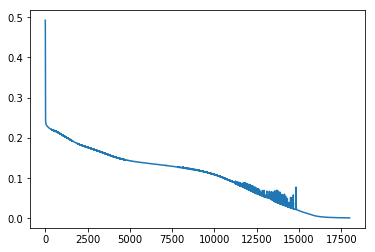

min error:  0.0012818887


In [43]:
plt.plot(errors)
plt.show()

min_error = np.min(errors)
print("min error: ", min_error)
# plt.plot(training_errors)
# plt.show()
# plt.plot(validation_accuracy)
# plt.show()


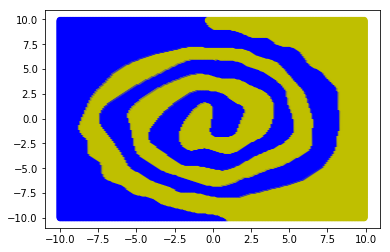

In [44]:
# generate a mesh grid act_range x act_range
mesh_x, mesh_y = np.meshgrid(activation_range, activation_range)
plt.scatter(mesh_x, mesh_y, c=['y' if np.round(pred) == 0 else 'b' for pred in predictions])
plt.show()

In [45]:
# for x_point, y_point, pred in list(zip(mesh_x, mesh_y, predictions)):
#     print(x_point, y_point, pred)
#     break
    
# np_mesh_x = np.array(mesh_x)
# print(np_mesh_x.shape)

In [46]:
# diff = np.array([y_prime[0] == y[0] for y_prime, y in zip(validation_pred, validation_y) ]).astype(int)
# print(diff.sum()/validation_y.shape[0])

/home/vuvuzella/Envs/machine_intelligence/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


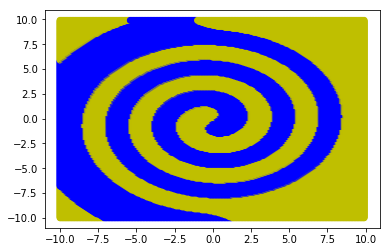

In [47]:
# Using SVMs
from sklearn.svm import SVC
import numpy as np

# SVM classifier
svm = SVC(C=0.1, kernel='rbf', gamma=1)
# x and y are spiral datapoints, native python arrays
svm.fit(x, y)

activation_range = np.arange(-10,10,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
svm_classifications = svm.predict(coordinates)
svm_mesh_x, svm_mesh_y = np.meshgrid(activation_range, activation_range)
plt.scatter(svm_mesh_x, svm_mesh_y, c=['b' if x > 0 else 'y' for x in svm_classifications])
plt.show()